# Xử lý ảnh

## INT3404 1 ----- 7-9 Monday - 303GD2
## Diep Ng., Ph.D.

### Mail-to: ngocdiep at vnu.edu.vn

## Week 6 (Oct 7, 2019)

In [1]:
!python --version

Python 3.6.8 :: Anaconda, Inc.


In [2]:
%matplotlib inline


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
plt.rcParams['figure.figsize'] = [4,3]

# Morphological operations

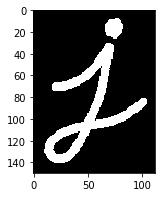

In [7]:
bw = cv2.imread("j.png", 0)
plt.imshow(bw, cmap='gray')

## Erosion 

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))
kernel

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

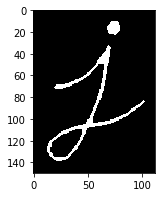

In [10]:
erosion = cv2.erode(bw, kernel, iterations=1)
plt.imshow(erosion, cmap='gray')

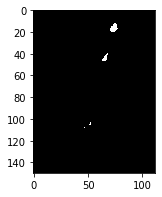

In [12]:
#more
erosion2 = cv2.erode(bw, kernel, iterations=2)
plt.imshow(erosion2, cmap='gray')

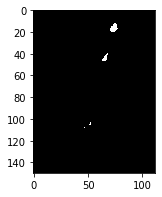

In [13]:
#or
erosion2 = cv2.erode(erosion, kernel, iterations=1)
plt.imshow(erosion2, cmap='gray')

## Dilation


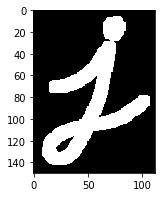

In [11]:
dilation = cv2.dilate(bw, kernel, iterations=1)
plt.imshow(dilation, cmap='gray')

## Combination of Dilation and Erosion

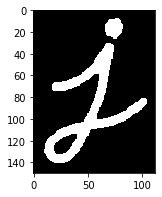

In [14]:
#dilation then erosion
de = cv2.erode(dilation, kernel, iterations=1)
plt.imshow(de, cmap='gray')

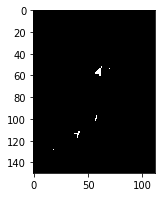

In [16]:
diff_de = bw - de
plt.imshow(diff_de, cmap='gray')

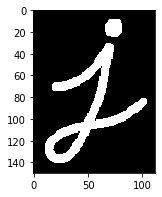

In [15]:
# erode then dilate?
ed = cv2.dilate(erosion, kernel, iterations=1)
plt.imshow(ed, cmap='gray')

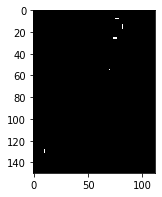

In [17]:
diff_ed = bw - ed
plt.imshow(diff_ed, cmap='gray')

## Opening


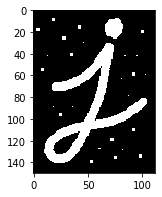

In [23]:
bw = cv2.imread("opening.png", 0)
plt.imshow(bw, cmap='gray')

In [26]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,5))

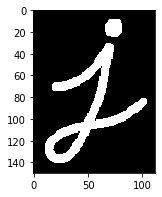

In [27]:
opening = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

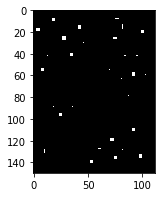

In [28]:
diff_opening = bw - opening
plt.imshow(diff_opening, cmap='gray')

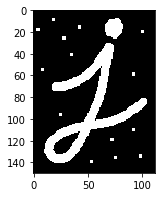

In [29]:
# what if smaller size of kernel

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
opening = cv2.morphologyEx(bw, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

## Closing


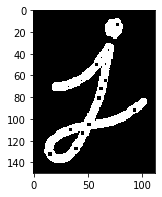

In [30]:
bw = cv2.imread("closing.png", 0)
plt.imshow(bw, cmap='gray')

In [31]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

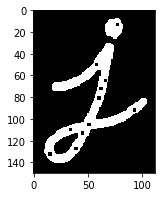

In [32]:
closing = cv2.morphologyEx(bw, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing, cmap='gray')

# License plate detection

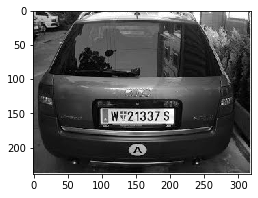

In [34]:
image = cv2.imread("license.jpg", 0)
plt.imshow(image, cmap='gray')

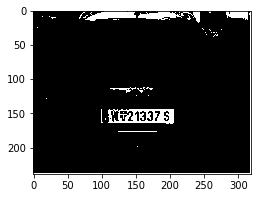

In [38]:
#thresholding
ret, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray')

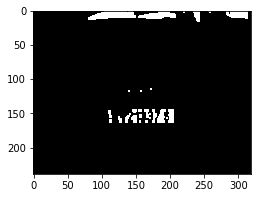

In [42]:

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
#remove some noise
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)
plt.imshow(opening, cmap='gray')

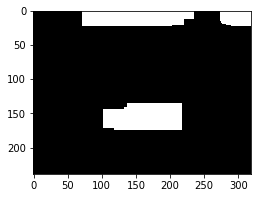

In [73]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (12, 12))
dilation = cv2.dilate(opening, kernel)
plt.imshow(dilation, cmap='gray')

In [94]:
nlabel,labels,stats,centroids = cv2.connectedComponentsWithStats(dilation,connectivity=8)


In [97]:
for i in range(1, nlabel):
    print(stats[i, cv2.CC_STAT_HEIGHT])

24
23
39


In [98]:
#get only the region with highest height

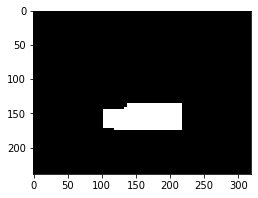

In [100]:
mask = np.zeros_like(dilation, dtype=np.uint8)
mask[labels==3] = 255
plt.imshow(mask, cmap='gray')